# Minimal Left Right Symmetric models with Higgs doublets

In this notebook we study the gauge-Higgs sector

In [1]:
from sympy import symbols, init_printing, I, Add, eye, conjugate, Eq
from sympy import sqrt, sin, cos, tan, trace, solve, Matrix, Function, factor
from sympy.physics import msigma 
from sympy.physics.quantum import Dagger
init_printing()

# Gauge Higgs interactions

In [2]:
from potential_senjanovic_HiggsDoublets import ChiL, ChiR, Phi, change_scalar_fields, complex_scalar_fields, change_scalar_fields_approx

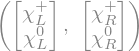

In [3]:
ChiL, ChiR

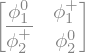

In [4]:
Phi

## Covariant derivative

### Higgs doublets 

In [5]:
g, gBL = symbols('g, g_{B-L}', positive=True)
W1L, W2L, W3L = symbols('W^1_L, W^2_L, W^3_L', real=True)
WL = [W1L, W2L, W3L]
W1R, W2R, W3R = symbols('W^1_R, W^2_R, W^3_R', real=True)
WR = [W1R, W2R, W3R]
Bmu = symbols(r'B_\mu', real=True)
B, L = symbols(r'B, L', real=True)

In [6]:
WsigmaL = Add(*[WL[i]*msigma(i+1) for i in range(3)])
WsigmaR = Add(*[WR[i]*msigma(i+1) for i in range(3)])

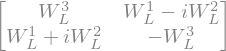

In [7]:
WsigmaL

In [8]:
WLp, WLm, WRp, WRm = symbols('W_L^+, W_L^-, W_R^+, W_R^-')
Wcharge_subs = {
    W1L - I*W2L:WLp,
    W1L + I*W2L:WLm,
    W1R - I*W2R:WRp,
    W1R + I*W2R:WRm
}

In [9]:
WsigmaL, WsigmaR = WsigmaL.subs(Wcharge_subs), WsigmaR.subs(Wcharge_subs)

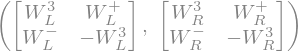

In [10]:
WsigmaL, WsigmaR

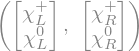

In [11]:
ChiL, ChiR

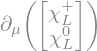

In [12]:
partial_mu = Function(r'\partial_\mu')
partial_mu(ChiL)

In [13]:
from potential_senjanovic_HiggsDoublets import chiL0, chiR0, chiLp, chiLm, chiRp, chiRm

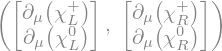

In [14]:
partial_mu_L = Matrix(
    [
        [partial_mu(chiLp)],
        [partial_mu(chiL0)],

    ]
)
partial_mu_R = Matrix(
    [
        [partial_mu(chiRp)],
        [partial_mu(chiR0)]
    ]
)
partial_mu_L, partial_mu_R

In [15]:
DmuL = - I*g/2*WsigmaL - I*gBL/2*Bmu*eye(2)
DmuR = - I*g/2*WsigmaR - I*gBL/2*Bmu*eye(2)

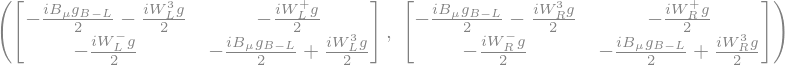

In [16]:
DmuL, DmuR

In [17]:
Dmu_ChiL = partial_mu_L +  DmuL*ChiL 
Dmu_ChiR = partial_mu_R + DmuR*ChiR

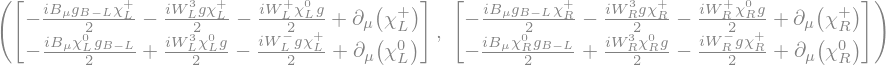

In [18]:
Dmu_ChiL.applyfunc(lambda x:x.expand()), Dmu_ChiR.applyfunc(lambda x:x.expand())

In [19]:
conjugate_fields = {
    conjugate(WLp):WLm,
    conjugate(WLm):WLp,
    conjugate(WRm):WRp,
    conjugate(WRp):WRm,
    conjugate(chiL0): chiL0,
    conjugate(chiR0): chiR0,
    conjugate(chiLp): chiLm,
    conjugate(chiLm): chiLp,
    conjugate(chiRm): chiRp,
    conjugate(chiRp): chiRm,
    conjugate(partial_mu(chiL0)): partial_mu(chiL0),
    conjugate(partial_mu(chiR0)): partial_mu(chiR0),
    conjugate(partial_mu(chiLp)): partial_mu(chiLm),
    conjugate(partial_mu(chiLm)): partial_mu(chiLp),
    conjugate(partial_mu(chiRm)): partial_mu(chiRp),
    conjugate(partial_mu(chiRp)): partial_mu(chiRm)
}

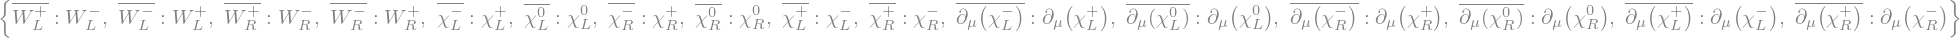

In [20]:
conjugate_fields

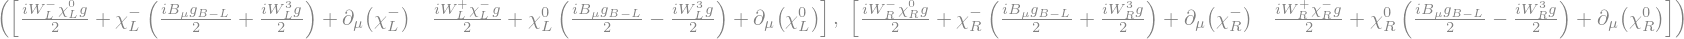

In [21]:
Dmu_ChiL_dagger = Dagger(Dmu_ChiL).subs(conjugate_fields)
Dmu_ChiR_dagger = Dagger(Dmu_ChiR).subs(conjugate_fields)

Dmu_ChiL_dagger, Dmu_ChiR_dagger

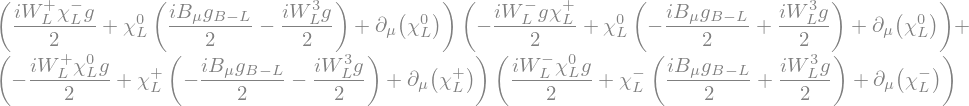

In [22]:
Dmu_ChiL_square = (Dmu_ChiL_dagger*Dmu_ChiL)[0]
Dmu_ChiL_square


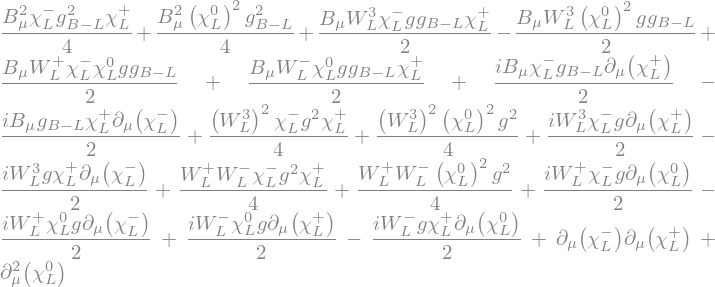

In [23]:
Dmu_ChiL_square.expand()

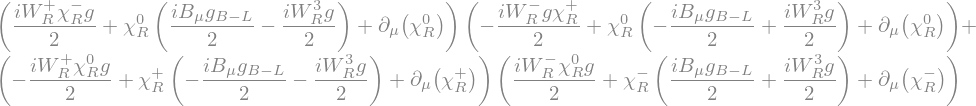

In [24]:
Dmu_ChiR_square = (Dmu_ChiR_dagger*Dmu_ChiR)[0]
Dmu_ChiR_square

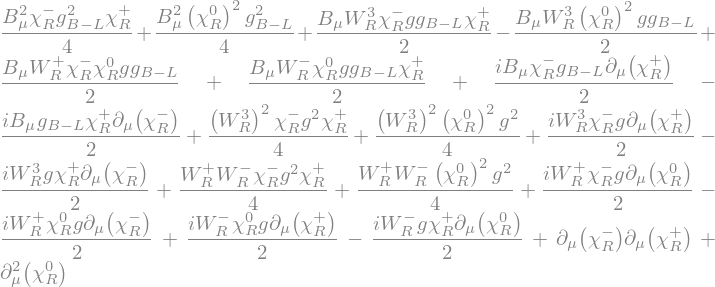

In [25]:
Dmu_ChiR_square.expand()

### Bidoublet

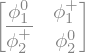

In [26]:
Phi

In [27]:
from potential_senjanovic_HiggsDoublets import phi10, phi20, phi1p, phi1m, phi2p, phi2m

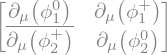

In [28]:
partial_mu_Phi = Matrix(
    [
        [partial_mu(phi10), partial_mu(phi1p)],
        [conjugate(partial_mu(phi2p)), partial_mu(phi20)],

    ]
)
partial_mu_Phi

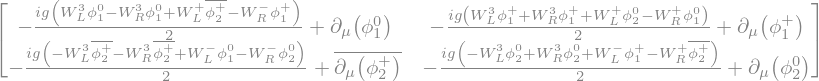

In [29]:
Dmu_Phi = partial_mu_Phi -I*g/2*(WsigmaL*Phi - Phi*WsigmaR).subs(conjugate_fields) # B - L = 0 for the bidoublet
Dmu_Phi

In [30]:
conjugate_scalarsPhi = {
    conjugate(phi10):phi10,
    conjugate(phi20):phi20,
    conjugate(phi1p):phi1m,
    conjugate(phi2p):phi2m,
    conjugate(phi1m):phi1p,
    conjugate(phi2m):phi2p,
    conjugate(partial_mu(phi10)):partial_mu(phi10),
    conjugate(partial_mu(phi20)):partial_mu(phi20),
    conjugate(partial_mu(phi1p)):partial_mu(phi1m),
    conjugate(partial_mu(phi2p)):partial_mu(phi2m),
    conjugate(partial_mu(phi1m)):partial_mu(phi1p),
    conjugate(partial_mu(phi2m)):partial_mu(phi2p)
}

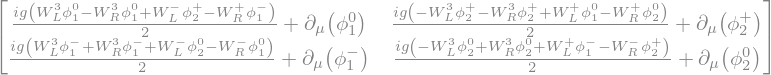

In [31]:
Dmu_Phi_dagger = Dagger(Dmu_Phi).subs(conjugate_scalarsPhi).subs(conjugate_fields)
Dmu_Phi_dagger

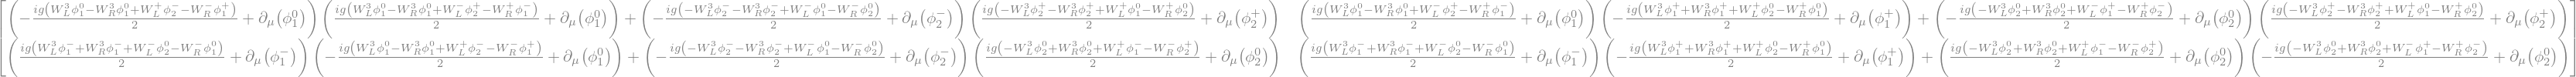

In [32]:
Dmu_Phi_Dmu = (Dmu_Phi_dagger*Dmu_Phi).subs(conjugate_scalarsPhi)#.subs(vevPhi)
Dmu_Phi_Dmu

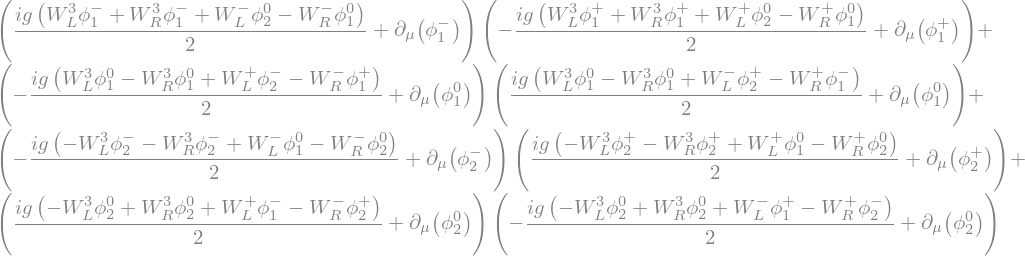

In [33]:
Tr_DmuPhi = trace(Dmu_Phi_Dmu)
Tr_DmuPhi 

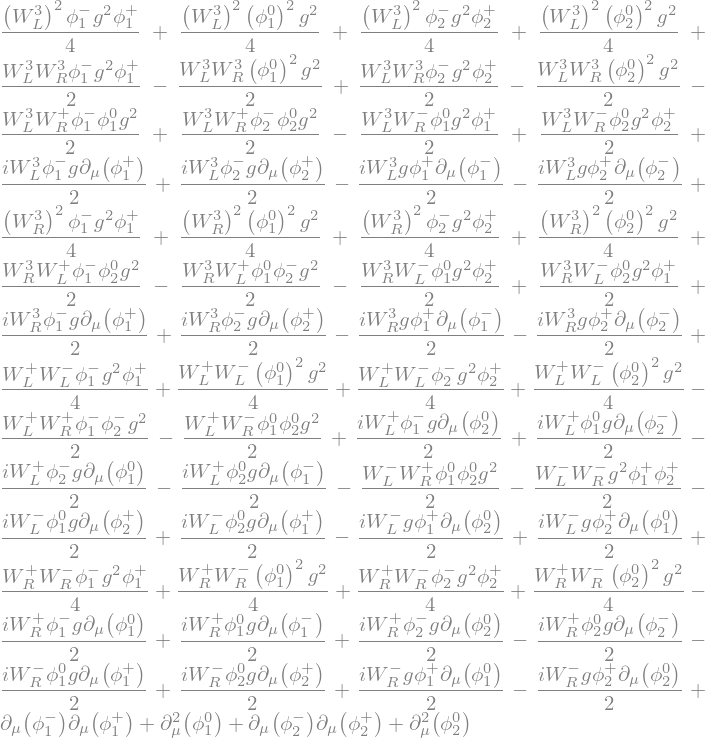

In [34]:
Tr_DmuPhi.expand()

## Kinetic Lagrangian of scalars

In [35]:
LHiggs = Dmu_ChiL_square + Dmu_ChiR_square + Tr_DmuPhi 

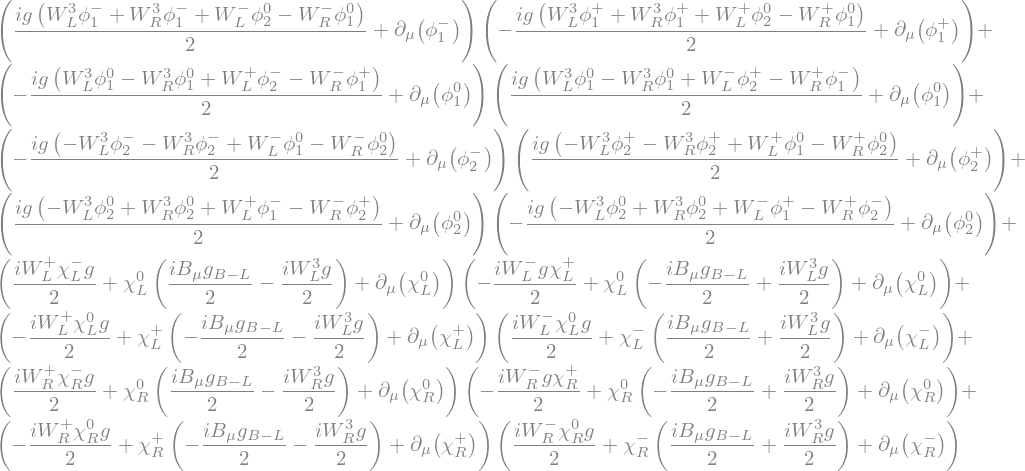

In [36]:
LHiggs

### $W^\pm$ mass matrix

In [37]:
LHiggs.free_symbols

In [38]:
from potential_senjanovic_HiggsDoublets import vevL, vevR, vevPhi, k1, k2, vL, vR

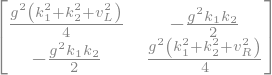

In [39]:
MW11 = LHiggs.diff(WLm, WLp)
MW12 = LHiggs.diff(WLm, WRp)
MW21 = LHiggs.diff(WRm, WLp)
MW22 = LHiggs.diff(WRm, WRp)

MW = Matrix(
    [
        [MW11, MW12],
        [MW21, MW22]
    ]
).subs(vevPhi).subs(vevL).subs(vevR)
MW

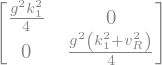

In [40]:
MW_k2_0 = MW.subs(k2, 0).subs(vL,0)
MW_k2_0

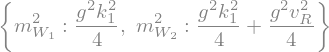

In [41]:
mW1, mW2 = symbols('m_{W_1}, m_{W_2}', positive=True)
mW_sol_k2vL_0 = solve(
    [Eq(mW1**2, MW_k2_0[0,0]), Eq(mW2**2, MW_k2_0[1,1])],
    [mW1**2, mW2**2], dict=True
)[0]
mW_sol_k2vL_0

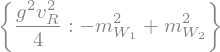

In [42]:
gvR_sol = solve(Eq(mW2**2, mW_sol_k2vL_0[mW2**2].subs((g**2*k1**2)/4, mW1**2)), (g**2*vR**2)/4, dict=True)[0]
gvR_sol

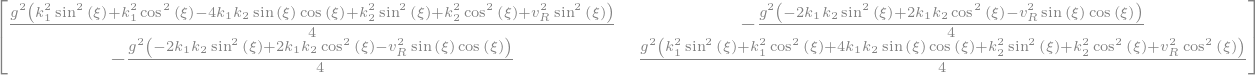

In [43]:
xi = symbols(r'\xi')
Oxi = Matrix(
    [
        [cos(xi), -sin(xi)],
        [sin(xi), cos(xi)]
    ]
)

MW_rotate = (Oxi.T*MW.subs(vL,0)*Oxi).applyfunc(factor)
MW_rotate

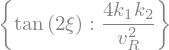

In [44]:
sin2xi_sol = solve(MW_rotate[0,1].trigsimp(), sin(2*xi), dict=True)[0]
sin2xi_sol
tan2xi_sol = {tan(2*xi): (sin(2*xi)/cos(2*xi)).subs(sin2xi_sol)}
tan2xi_sol

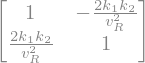

In [45]:
Oxi_approx = Oxi.subs(sin(xi), tan2xi_sol[tan(2*xi)]/2).subs(cos(xi), 1)
Oxi_approx

Then, we have a mixing amon two charged gauge bosons
$$
W_{L}^{\pm}=	\cos\left(\xi\right)W_{1}^{+}-\sin\left(\xi\right)W_{2}^{+}\\
W_{R}^{\pm}=	\cos\left(\xi\right)W_{2}^{+}+\sin\left(\xi\right)W_{1}^{+}
$$

In [46]:
W1p, W2p = symbols('W_1^+, W_2^+')
W1m, W2m = symbols('W_1^-, W_2^-')

W12p_doublet = Matrix(
    [
        [W1p],
        [W2p]
    ]
)
mixingW12 = Oxi*W12p_doublet
mixingW12
WLp_mix = mixingW12[0]
WRp_mix = mixingW12[1]
WLp_mix, WRp_mix

In [47]:
change_charged_bosons = {
    WLp:WLp_mix, WRp:WRp_mix,
    WLm:WLp_mix.subs(W1p, W1m).subs(W2p, W2m), WRm:WRp_mix.subs(W1p, W1m).subs(W2p, W2m)
}
change_charged_bosons

In the case of $k_2 = 0$, there is no mixing

In [49]:
change_charged_bosons_approx = {
    key: value.subs(cos(xi), 1).subs(sin(xi), 0) for key, value in change_charged_bosons.items() 
}
change_charged_bosons_approx

### Neutral gaube bosons

In [50]:
from symbolic_tools import build_mass_matrix

In [51]:
WLWRB = [W3L, W3R, Bmu]
M0_square = build_mass_matrix(LHiggs, WLWRB, WLWRB).applyfunc(lambda x:x.simplify())/2
M0_square = M0_square.subs(vevPhi).subs(vevL).subs(vevR)

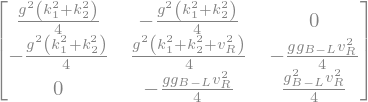

In [52]:
M0_square_vL0 = M0_square.applyfunc(factor).subs(vL,0)
M0_square_vL0

In [53]:
M0_square_vL0.det()

In [54]:
M0_eigenvals = M0_square_vL0.eigenvals()

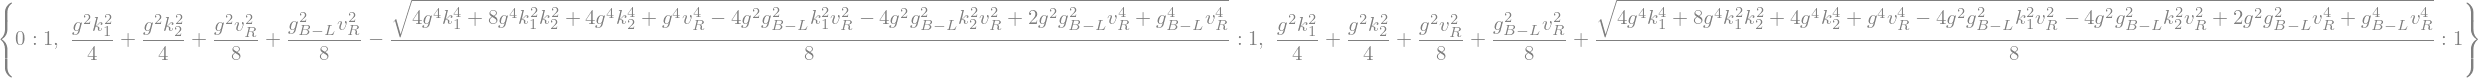

In [51]:
M0_eigenvals

In [55]:
M0_eigenvects = M0_square_vL0.eigenvects()

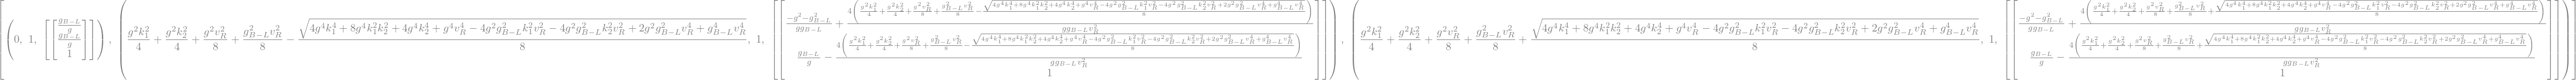

In [53]:
M0_eigenvects

In [56]:
P0 = Matrix.hstack(*[eigeninfo[2][0]/(eigeninfo[2][0]).norm() for eigeninfo in M0_eigenvects])


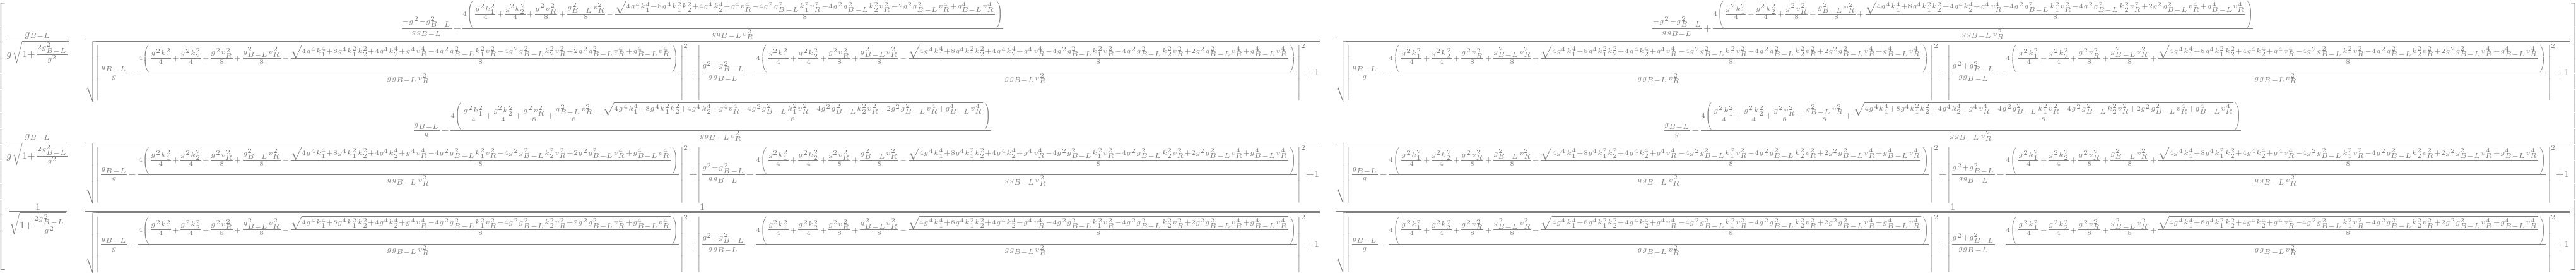

In [55]:
P0

In [57]:
from potential_senjanovic_HiggsDoublets import epsilon

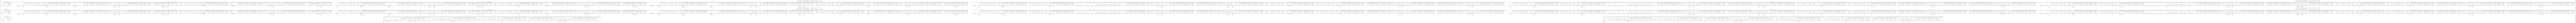

In [58]:
P0_approx = P0.applyfunc(
    lambda x: x.subs(k1, epsilon*vR).series(x=epsilon, x0=0, n=2).removeO().subs(epsilon, k1/vR)
).applyfunc(
    lambda x: x.subs(k2, epsilon*vR).series(x=epsilon, x0=0, n=2).removeO().subs(epsilon, k2/vR)
)
P0_approx

In [59]:
#P0_approx.applyfunc(factor)

In [60]:
sqrt_P0 = P0_approx[0,1].args[0].args[3].args[0].args[3].args[-1].args[0].args[0].args[0].args[0]
sqrt_P0

In [61]:
sqrt_P0_factor = sqrt_P0.factor()
sqrt_P0_factor

In [62]:
P0_approx = P0_approx.subs(sqrt_P0, sqrt_P0_factor).applyfunc(factor)

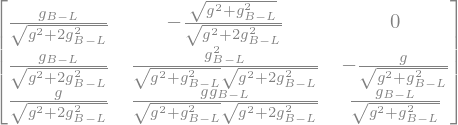

In [62]:
P0_approx

In [63]:
P0_approx_inv = P0_approx.inv()

In [64]:
M0_square_vL0_rotationg = (P0_approx_inv*M0_square_vL0*P0_approx).applyfunc(
    lambda x:x.factor().expand().collect(vR, factor)
)

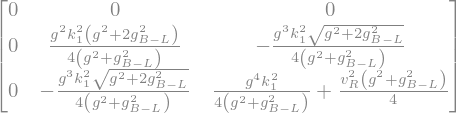

In [65]:
M0_square_vL0_rotationg_k2_0 = M0_square_vL0_rotationg.subs(k2,0)
M0_square_vL0_rotationg_k2_0

with the definition $e = g \sin{\theta_W}$ and 
$$\frac{1}{e^2} = \frac{2}{g^2} + \frac{1}{g_{B-L}^2}$$

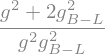

In [66]:
e_square_inv = (2/g**2+ 1/gBL**2).factor()
e_square_inv

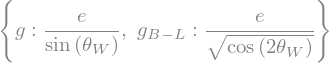

In [67]:
e = symbols('e', positive=True)
thw = symbols(r'\theta_W')
g_changes = {
    g:e/sin(thw),
    gBL:e/sqrt(cos(2*thw))
}
g_changes

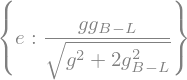

In [68]:
e_sol = solve(Eq(1/e**2, e_square_inv), e, dict=True)[0]
e_sol

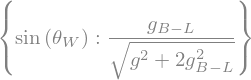

In [69]:
sinthw_sol_ggBL =  solve((1/e).subs(e_sol) - 1/(g*sin(thw)), sin(thw), dict=True)[0]
sinthw_sol_ggBL

Remember the trigonometric identity $\cos{\theta_W}^2 = 1 - \sin{\theta_W}^2$

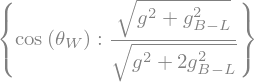

In [70]:
costhw_sol_ggBL = solve(Eq(cos(thw)**2, (1-sin(thw)**2).subs(sinthw_sol_ggBL)), cos(thw), dict=True)[1]
costhw_sol_ggBL

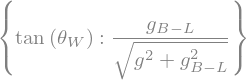

In [71]:
tanthw_sol_ggBL = {tan(thw): (sin(thw)/cos(thw)).subs(sinthw_sol_ggBL).subs(costhw_sol_ggBL)}
tanthw_sol_ggBL

Also, with the identity $\cos{2\theta_W} = \cos{\theta_W}^2 - \sin{\theta_W}^2$

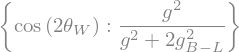

In [72]:
cos2thw_sol_ggBL = solve(
    Eq(cos(2*thw), (cos(thw)**2 - sin(thw)**2).subs(sinthw_sol_ggBL).subs(costhw_sol_ggBL)), 
    cos(2*thw), dict=True
)[0]
cos2thw_sol_ggBL

In [73]:
cos2thw_sol_ggBL[sqrt(cos(2*thw))] = sqrt(cos2thw_sol_ggBL[cos(2*thw)])

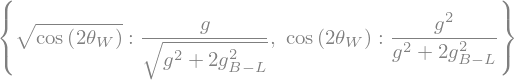

In [74]:
cos2thw_sol_ggBL

Finally, we have $1 - \tan^2{\theta_W} = 1 - \frac{\sin^2{\theta_W}}{\cos^2{\theta_W}}=\frac{\cos^2{\theta_W} - \sin^2{\theta_W}}{\cos^2{\theta_W}} = \frac{\cos{2\theta_W}}{\cos^2{\theta_W}}$

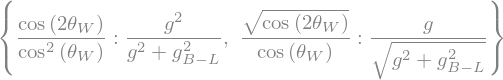

In [75]:
cos2thw_cosW_square_sol_ggBL = {
    cos(2*thw)/cos(thw)**2: (cos(2*thw)/cos(thw)**2).subs(cos2thw_sol_ggBL).subs(costhw_sol_ggBL)
}
cos2thw_cosW_square_sol_ggBL[sqrt(cos(2*thw))/cos(thw)] = sqrt(cos2thw_cosW_square_sol_ggBL[cos(2*thw)/cos(thw)**2]).expand()
cos2thw_cosW_square_sol_ggBL


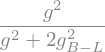

In [76]:
(1-2*sin(thw)**2).subs(sinthw_sol_ggBL).simplify()

In [77]:
from symbolic_tools import invert_dict

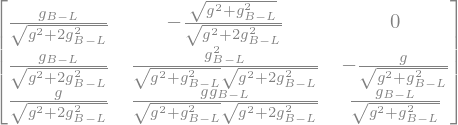

In [78]:
P0_approx

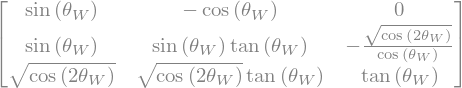

In [79]:
P0_approx2_angles = P0_approx.subs(
    invert_dict(costhw_sol_ggBL)
).subs(
    invert_dict(sinthw_sol_ggBL)
).subs(
    invert_dict(tanthw_sol_ggBL)
).subs(
    invert_dict(cos2thw_cosW_square_sol_ggBL)
).applyfunc(lambda x:x.trigsimp()).subs(
    invert_dict(cos2thw_sol_ggBL)
)
P0_approx2_angles


In [80]:
P0_approx2_angles_inv = P0_approx2_angles.inv().applyfunc(lambda x:x.trigsimp()) #P0_approx2.inv()

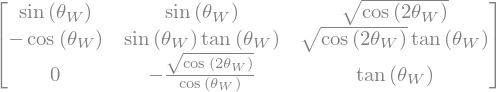

In [81]:
P0_approx2_angles_inv

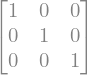

In [82]:
(P0_approx2_angles_inv*P0_approx2_angles).applyfunc(
    lambda x:x.trigsimp().collect(tan(thw)**2, lambda x:x.trigsimp().collect(cos(thw)**2, factor))
).subs(
    tan(thw)**2, 1/cos(thw)**2 - 1
).applyfunc(factor)

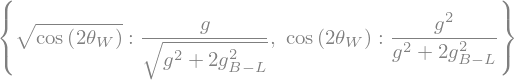

In [83]:
cos2thw_sol_ggBL

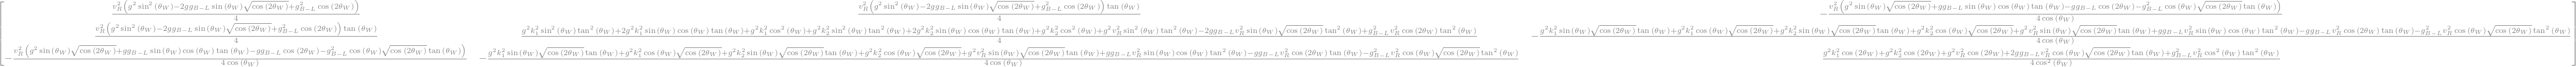

In [84]:
M0_square_vL0_rotation1 = (P0_approx2_angles_inv*M0_square_vL0*P0_approx2_angles).applyfunc(factor)
M0_square_vL0_rotation1

In [85]:
M0_square_vL0_rotation1[0,0] = M0_square_vL0_rotation1[0,0].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [86]:
M0_square_vL0_rotation1[0,1] = M0_square_vL0_rotation1[0,1].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [87]:
M0_square_vL0_rotation1[0,2] = M0_square_vL0_rotation1[0,2].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [88]:
M0_square_vL0_rotation1[1,0] = M0_square_vL0_rotation1[1,0].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

In [89]:
M0_square_vL0_rotation1[2,0] = M0_square_vL0_rotation1[2,0].subs(sinthw_sol_ggBL).subs(cos2thw_sol_ggBL)

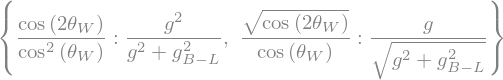

In [90]:
cos2thw_cosW_square_sol_ggBL

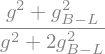

In [91]:
costhw_sol_ggBL[cos(thw)]**2

In [92]:
M0_square_vL0_rotation1[1,1] = (M0_square_vL0_rotation1[1,1].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True)*4/(g**2*(k1**2 + k2**2))).subs(
    1/costhw_sol_ggBL[cos(thw)]**2, 1/cos(thw)**2
)*((g**2*(k1**2 + k2**2))/4)

In [93]:
M0_square_vL0_rotation1[1,2] = M0_square_vL0_rotation1[1,2].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True).subs(
    sqrt(g**2 + 2*gBL**2), gBL/sin(thw)
).subs(
    g**2 + gBL**2, g**2*cos(thw)**2/cos(2*thw) 
).subs(
    4*sin(thw)*cos(thw)**2, 2*(sin(2*thw))*cos(thw)
).trigsimp()

In [94]:
M0_square_vL0_rotation1[2,1] = M0_square_vL0_rotation1[2,1].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True).subs(
    sqrt(g**2 + 2*gBL**2), gBL/sin(thw)
).subs(
    g**2 + gBL**2, g**2*cos(thw)**2/cos(2*thw) 
).subs(
    4*sin(thw)*cos(thw)**2, 2*(sin(2*thw))*cos(thw)
).trigsimp()

In [95]:
M0_square_vL0_rotation1[2,2] = M0_square_vL0_rotation1[2,2].subs(
    sinthw_sol_ggBL
).subs(
    costhw_sol_ggBL
).subs(
    tanthw_sol_ggBL
).subs(
    cos2thw_sol_ggBL
).factor(deep=True).collect(vR, factor).subs(
    g**2 + gBL**2, g**2*cos(thw)**2/cos(2*thw) 
).expand().collect(vR, factor)

With the identity $sin^2{\theta_W} = \frac{1}{2}(1 - \cos{2\theta_W})$

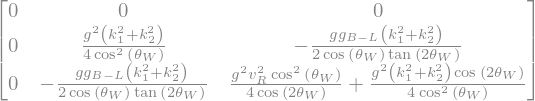

In [97]:
M0_square_vL0_rotation1

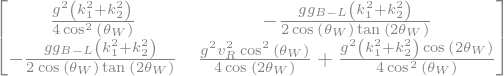

In [96]:
m0_square_vL0_rotation1 = M0_square_vL0_rotation1[1:, 1:]
m0_square_vL0_rotation1

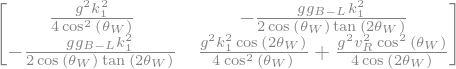

In [97]:
m0_square_vL0_rotation1.subs(k2,0)

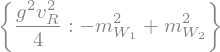

In [98]:
gvR_sol

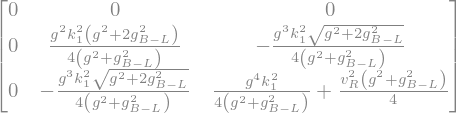

In [393]:
M0_square_vL0_rotationg_k2_0

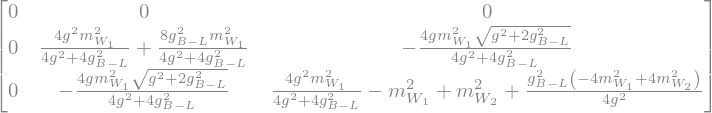

In [99]:
M0_square_vL0_rotationg_k2_0_mWs = M0_square_vL0_rotationg_k2_0.applyfunc(
    lambda x:x.expand().collect([(g**2*k1**2)/4, (g**2*vR**2)/4])
).subs(gvR_sol).subs(k1**2, (4*mW1**2)/g**2).subs(vR**2, (4*(mW2**2 - mW1**2))/g**2)
M0_square_vL0_rotationg_k2_0_mWs

In [100]:
x = symbols('x')

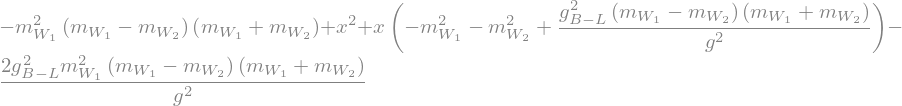

In [101]:
M0_square_vL0_rotationg_k2_0_mWs_det = (M0_square_vL0_rotationg_k2_0_mWs[1:,1:] - eye(2)*x).det().expand().collect(
    x, lambda x:x.collect([g,gBL], factor)
)
M0_square_vL0_rotationg_k2_0_mWs_det

In [102]:
MZs_mws_sol = solve(M0_square_vL0_rotationg_k2_0_mWs_det, x, dict=True)

In [103]:
mZ1, mZ2 = MZs_mws_sol[0][x], MZs_mws_sol[1][x]

In [104]:
mZ1_approx = mZ1.subs(mW1**2, epsilon*mW2**2).series(epsilon, 0, 2).removeO().subs(epsilon, mW1**2/mW2**2)
mZ2_approx = mZ2.subs(mW1**2, epsilon*mW2**2).series(epsilon, 0, 2).removeO().subs(epsilon, mW1**2/mW2**2)

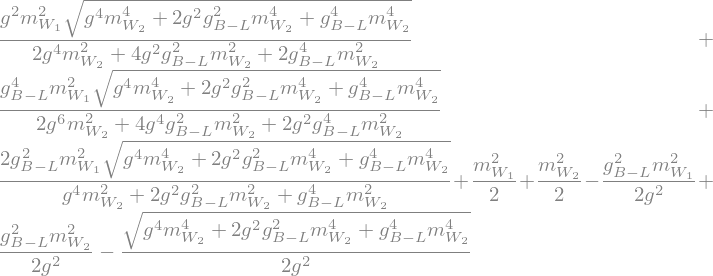

In [402]:
mZ1_approx.expand()

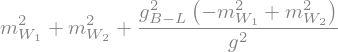

In [105]:
(mZ2_approx + mZ1_approx).expand().collect(gBL, lambda x:x.simplify())

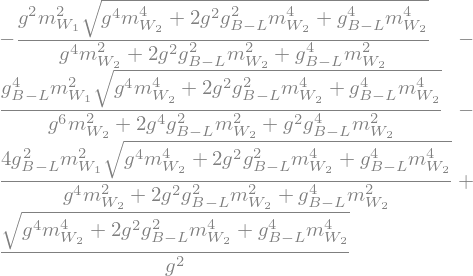

In [401]:
(mZ2_approx - mZ1_approx).expand()

In [106]:
sqrt_mz12 = (mZ2_approx - mZ1_approx).expand().args[0].args[1].args[0]
sqrt_mz12

In [107]:
sqrt_mz12_factor = sqrt_mz12.collect([mW1, mW2], lambda x:x.factor())
sqrt_mz12_factor

In [108]:
mZ1_approx2 = mZ1_approx.subs(sqrt_mz12, sqrt_mz12_factor).factor()
mZ2_approx2 = mZ2_approx.subs(sqrt_mz12, sqrt_mz12_factor).expand().collect([mW1, mW2], factor)

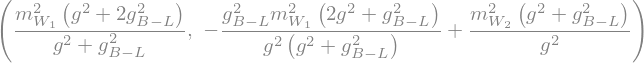

In [350]:
mZ1_approx2, mZ2_approx2

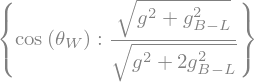

In [353]:
costhw_sol_ggBL

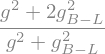

In [356]:
1/costhw_sol_ggBL[cos(thw)]**2

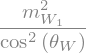

In [109]:
mZ1_mW1 = mZ1_approx2.subs(1/costhw_sol_ggBL[cos(thw)]**2, 1/cos(thw)**2)
mZ1_mW1

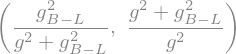

In [374]:
tanthw_sol_ggBL[tan(thw)]**2, 1/cos2thw_cosW_square_sol_ggBL[cos(2*thw)/cos(thw)**2]

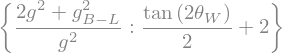

In [110]:
ggbL_tanthw = {(2*g**2 + gBL**2)/g**2: tan(2*thw)/2 + 2}
#ggbL_tanthw = {(2*g**2 + gBL**2)/g**2: tan(thw)*(cos(thw)**2/cos(2*thw)) + 2}

ggbL_tanthw

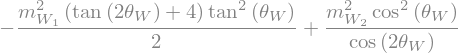

In [111]:
mZ2_mW12 = mZ2_approx2.subs(tanthw_sol_ggBL[tan(thw)]**2, tan(thw)**2).subs(
    1/cos2thw_cosW_square_sol_ggBL[cos(2*thw)/cos(thw)**2], 1/(cos(2*thw)/cos(thw)**2)
).subs(ggbL_tanthw).expand().collect([mW1, mW2], lambda x:x.factor())
mZ2_mW12

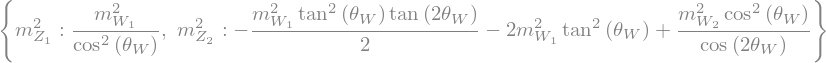

In [112]:
mZ1_sym, mZ2_sym = symbols('m_{Z_1}, m_{Z_2}', positive=True)
mZ12_sol = solve(
    [
        Eq(mZ1_sym**2, mZ1_mW1),
        Eq(mZ2_sym**2, mZ2_mW12)
    ],
    [mZ1_sym**2, mZ2_sym**2], dict=True
)[0]
mZ12_sol

In [343]:
#r1, r2 = symbols('r_1. r_2', positive=True)
#r12_sol = solve(
#    [
#        Eq(r1**2, g**2 + gBL**2),
#        Eq(r2**2, g**2 + 2*gBL**2)
#    ],
#    [g**2, gBL**2], dict=True
#)[0]
#r12_sol

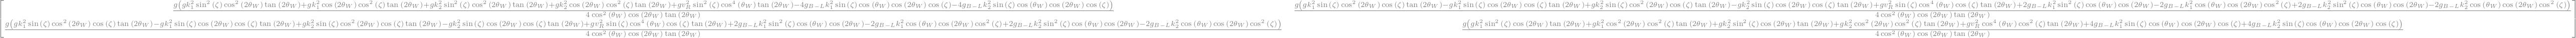

In [113]:
zeta = symbols(r'\zeta')
Ozeta = Matrix(
    [
        [cos(zeta), -sin(zeta)],
        [sin(zeta), cos(zeta)]
    ]
)

m0_rotate = (Ozeta.T*m0_square_vL0_rotation1*Ozeta).applyfunc(factor)
m0_rotate

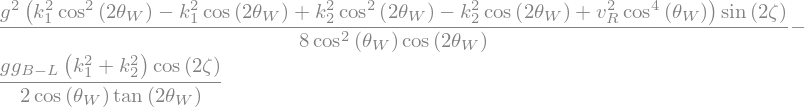

In [114]:
m0_rotate[0,1].collect([sin(zeta), cos(zeta)], factor).subs(
    {
        sin(zeta)*cos(zeta):sin(2*zeta)/2,
        cos(zeta)**2:(1 + cos(2*zeta))/2,
        sin(zeta)**2:(1 - cos(2*zeta))/2
    }
).expand().collect([sin(2*zeta), cos(2*zeta)], lambda x:x.factor())

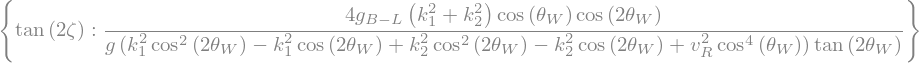

In [115]:
sin2zeta_sol = solve(m0_rotate[0,1].collect([sin(zeta), cos(zeta)], factor).subs(
    {
        sin(zeta)*cos(zeta):sin(2*zeta)/2,
        cos(zeta)**2:(1 + cos(2*zeta))/2,
        sin(zeta)**2:(1 - cos(2*zeta))/2
    }
).expand().collect([sin(2*zeta), cos(2*zeta)], lambda x:x.factor()), 
sin(2*zeta), dict=True)[0]
#sin2zeta_sol
tan2zeta_sol = {tan(2*zeta): (sin(2*zeta)/cos(2*zeta)).subs(sin2zeta_sol).factor()}
tan2zeta_sol


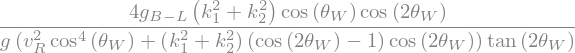

In [116]:
tan2zeta_sol[tan(2*zeta)].collect(vR,factor)

In [117]:
from sympy import fraction

In [118]:
co2zeta, ca2zeta = fraction(tan2zeta_sol[tan(2*zeta)].subs(k2, 0).collect(vR,factor))
co2zeta.trigsimp(), ca2zeta.trigsimp()

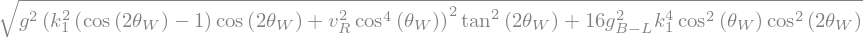

In [119]:
h2zeta = sqrt((co2zeta**2 + ca2zeta**2).trigsimp())
h2zeta

In [120]:
sin2zeta = co2zeta/h2zeta
cos2zeta = ca2zeta/h2zeta

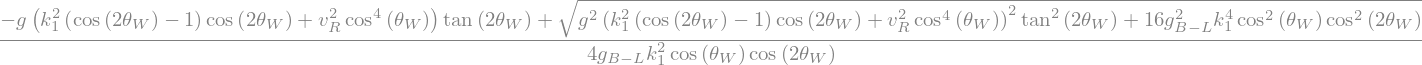

In [121]:
tanzeta = ((1 - cos2zeta)/sin2zeta).simplify()
tanzeta

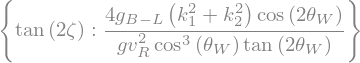

In [124]:
tan2zeta_sol_approx = {tan(2*zeta):tan2zeta_sol[tan(2*zeta)].collect(vR,factor).subs((k1**2 + k2**2), epsilon*vR**2).series(
    x=epsilon, x0=0, n=2
).removeO().subs(epsilon, (k1**2 + k2**2)/vR**2)}
tan2zeta_sol_approx

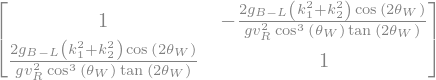

In [128]:
Ozeta_approx = Ozeta.subs(cos(zeta), 1).subs(sin(zeta),tan2zeta_sol_approx[tan(2*zeta)]/2)
Ozeta_approx

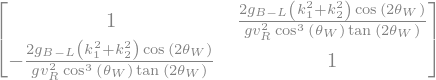

In [129]:
OzetaT_approx = Ozeta.T.subs(cos(zeta), 1).subs(sin(zeta),tan2zeta_sol_approx[tan(2*zeta)]/2)
OzetaT_approx

## Mixing among neutral gauge bosons

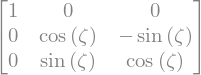

In [130]:
Ozeta3d = Matrix(
    [
        [1, 0, 0],
        [0, Ozeta[0,0], Ozeta[0,1]],
        [0, Ozeta[1,0], Ozeta[1,1]]
    ]
)
Ozeta3d

In [131]:
P0 = Ozeta3d*P0_approx2_angles

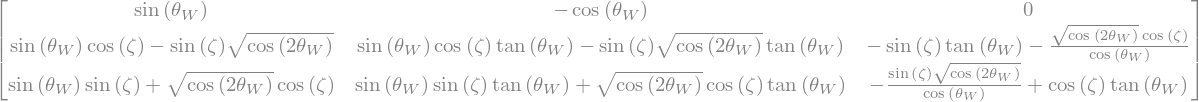

In [132]:
P0

In [133]:
P0_inv = P0_approx2_angles_inv*Ozeta3d.inv()

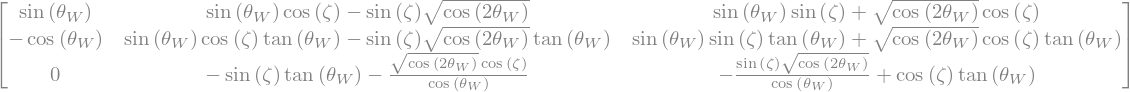

In [134]:
P0_inv = P0_inv.applyfunc(lambda x:x.trigsimp())
P0_inv

In [135]:
#thw, phi = symbols(r'\theta_W, phi')
#cw, sw = cos(thw), sin(thw)
#sM = tan(thw)
#cM = sqrt(cos(2*thw))/cos(thw)
#cphi, sphi = cos(phi), sin(phi)
#R0 = Matrix(
#    [
#        [cw*cphi, cw*sphi, sw],
#        [-sw*sM*cphi - cM*sphi, -sw*sM*sphi + cM*cphi, cw*sM],
#        [-sw*cM*cphi + sM*sphi, -sw*cM*sphi - sM*cphi, cw*cM]
#    ]
#)
#R0

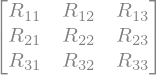

In [136]:
R11, R12, R13 = symbols('R_{11}, R_{12}, R_{13}', real=True)
R21, R22, R23 = symbols('R_{21}, R_{22}, R_{23}', real=True)
R31, R32, R33 = symbols('R_{31}, R_{32}, R_{33}', real=True)

R = Matrix(
    [
        [R11, R12, R13],
        [R21, R22, R23],
        [R31, R32, R33]
    ]
)
R

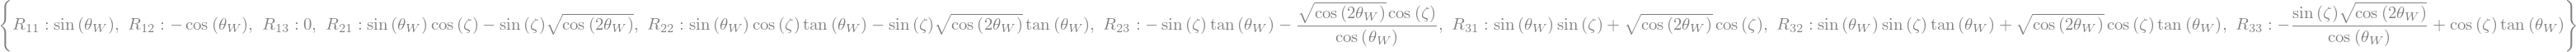

In [137]:
changes_R_neutral_bosons = {r:o for r, o in zip(list(R), list(P0))}
changes_R_neutral_bosons

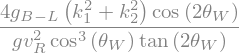

In [138]:
tan2zeta_sol_approx[tan(2*zeta)].subs(invert_dict(changes_R_neutral_bosons))

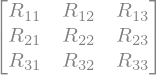

In [139]:
P0R = R
P0R

In [140]:
Z1, Z2, A = symbols('Z1, Z2, A', real=True)

mixingZ12A = P0*Matrix([
    [A],
    [Z1],
    [Z2]
])
mixingZ12A_R = P0R*Matrix([
    [A],
    [Z1],
    [Z2]
])

In [141]:
W3L_mix = mixingZ12A[0]
W3R_mix = mixingZ12A[1]
B_mix = mixingZ12A[2]

W3L_mix_R = mixingZ12A_R[0]
W3R_mix_R = mixingZ12A_R[1]
B_mix_R = mixingZ12A_R[2]

W3L_mix_R.subs(R13, 0), W3R_mix_R, B_mix_R

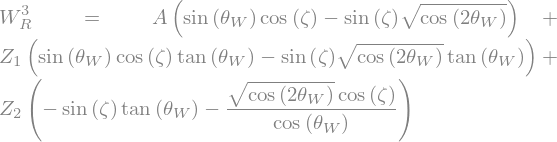

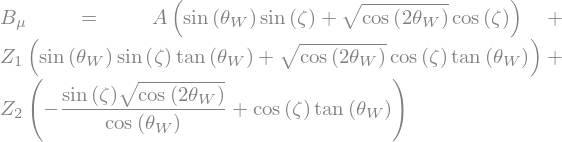

In [142]:
change_neutral_bosons = {W3L:W3L_mix, W3R:W3R_mix, Bmu:B_mix}
change_neutral_bosons_R = {W3L:W3L_mix_R, W3R:W3R_mix_R, Bmu:B_mix_R}
for field, mixing in change_neutral_bosons.items():
    display(Eq(field, mixing))

In [133]:
for field, mixing in change_neutral_bosons_R.items():
    display(Eq(field, mixing.subs(R13, 0)))

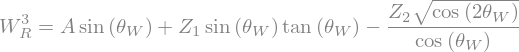

In [145]:
change_neutral_bosons_approx = {}
for field, mixing in change_neutral_bosons.items():
    change_neutral_bosons_approx[field] = mixing.subs(sin(zeta),0).subs(cos(zeta),1)
    display(
        Eq(
            field, change_neutral_bosons_approx[field]
        )
    )


## Physical basis LHiggs

In [146]:
change_charged_bosons

In [147]:
change_charged_bosons_approx

In [135]:
change_neutral_bosons_R

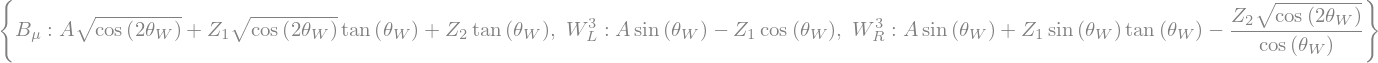

In [148]:
change_neutral_bosons_approx

In [149]:
LHiggs.free_symbols

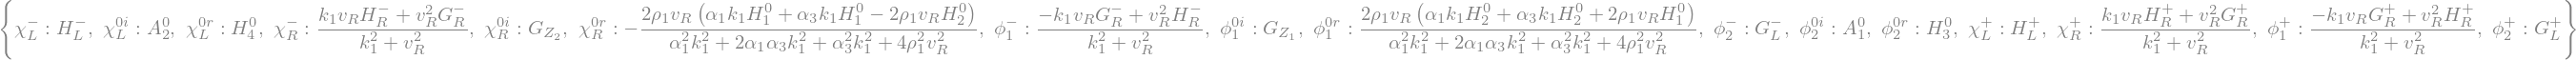

In [150]:
change_scalar_fields

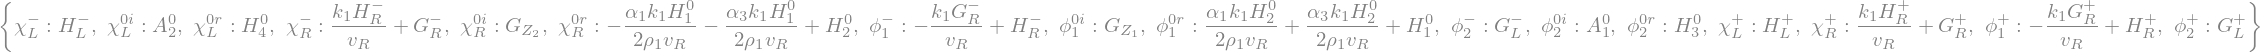

In [151]:
change_scalar_fields_approx

In [152]:
LHiggs_physical = LHiggs.subs(
    change_charged_bosons
).subs(
    change_neutral_bosons_R
).subs(
    complex_scalar_fields
).subs(
    change_scalar_fields
)

In [153]:
LHiggs_physical.free_symbols

In [158]:
LHiggs_physical_approx = LHiggs.subs(
    change_charged_bosons_approx
).subs(
    change_neutral_bosons_approx
).subs(
    complex_scalar_fields
).subs(
    change_scalar_fields_approx
).subs(k2,0).subs(vL,0)

In [159]:
LHiggs_physical_approx.free_symbols